# Decision Trees

## 1.Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
sns.set(style='darkgrid', context='talk',palette ='twilight_r')

In [2]:
df_iris = pd.read_csv('Iris.csv')
df_iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## 2. Summarizing the data 

In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## 3. Data cleaning

In the above dataframe, the Id column is unnecessary and hence, we will drop it. More over, the word Iris has been repeated every time which provides no extra info. Hence, we will try to remove the iris word from the Species column.

In [5]:
df_iris.drop('Id',axis=1,inplace=True)

In [6]:
df_split = df_iris['Species'].str.rsplit('-',expand=True)
df_iris.drop('Species',axis=1,inplace=True)

In [7]:
df_iris['Species'] = df_split.iloc[:,-1]
df_iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## 2. Data Visualisation

### Sepal and Petal dimensions

Checking how are the Sepal lengths and widths distributed

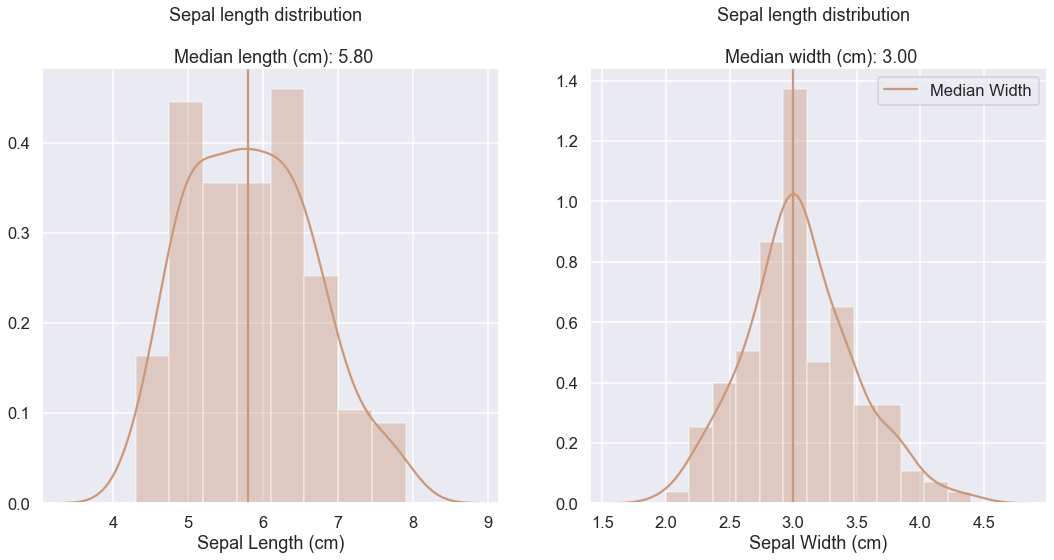

In [8]:
fig,ax = plt.subplots(1,2,figsize=(18,8))
g = sns.distplot(df_iris['SepalLengthCm'],ax = ax[0])
ax[0].set_xlabel('Sepal Length (cm)')
ax[0].set_title('Sepal length distribution  \n \n Median length (cm): {0:.2f}'.format(df_iris['SepalLengthCm'].median()))
g.axvline(df_iris['SepalLengthCm'].median(),label='Median length')

h = sns.distplot(df_iris['SepalWidthCm'],ax = ax[1])
ax[1].set_xlabel('Sepal Width (cm)')
ax[1].set_title('Sepal length distribution  \n \n Median width (cm): {0:.2f}'.format(df_iris['SepalWidthCm'].median()))
h.axvline(df_iris['SepalWidthCm'].median(),label='Median Width')
ax[1].legend()
plt.show()

This seems to be a normal distribution for both sepal lengths and widths.The median sepal length is 5.8 cm while median sepal width is 3 cm.

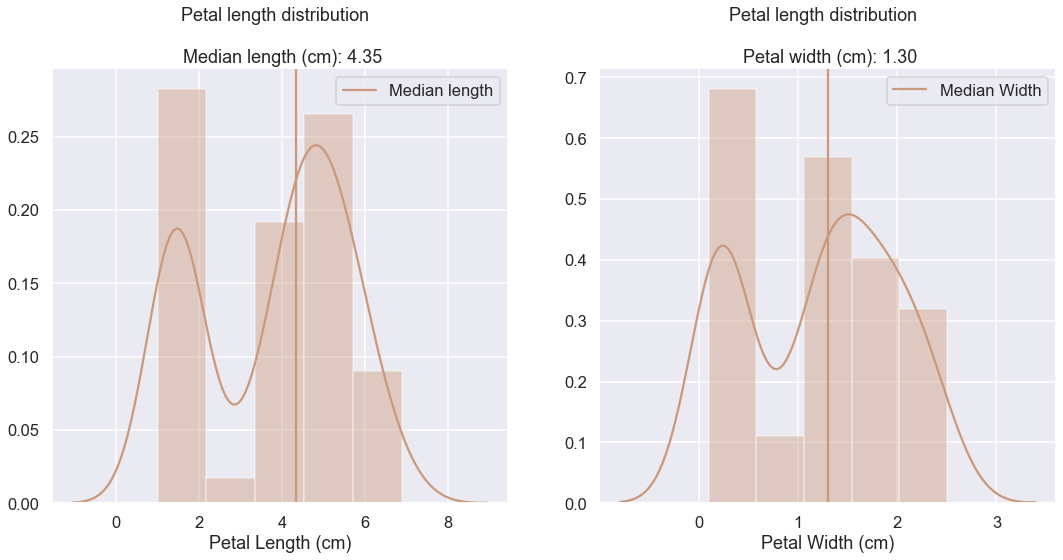

In [9]:
fig, ax = plt.subplots(1,2,figsize=(18,8))

g=sns.distplot(df_iris['PetalLengthCm'],ax=ax[0])
ax[0].set_xlabel('Petal Length (cm)')
ax[0].set_title('Petal length distribution  \n \n Median length (cm): {0:.2f}'.format(df_iris['PetalLengthCm'].median()))
g.axvline(df_iris['PetalLengthCm'].median(),label='Median length')
ax[0].legend()

h=sns.distplot(df_iris['PetalWidthCm'],ax=ax[1])
ax[1].set_xlabel('Petal Width (cm)')
ax[1].set_title('Petal length distribution  \n \n Petal width (cm): {0:.2f}'.format(df_iris['PetalWidthCm'].median()))
h.axvline(df_iris['PetalWidthCm'].median(),label='Median Width')
ax[1].legend()
plt.show()

The petal lengths and width are highly dispersed.It seems like the distribution is bimodal in nature i.e. with two peaks.

### Sepal and petal distributions of each flower species

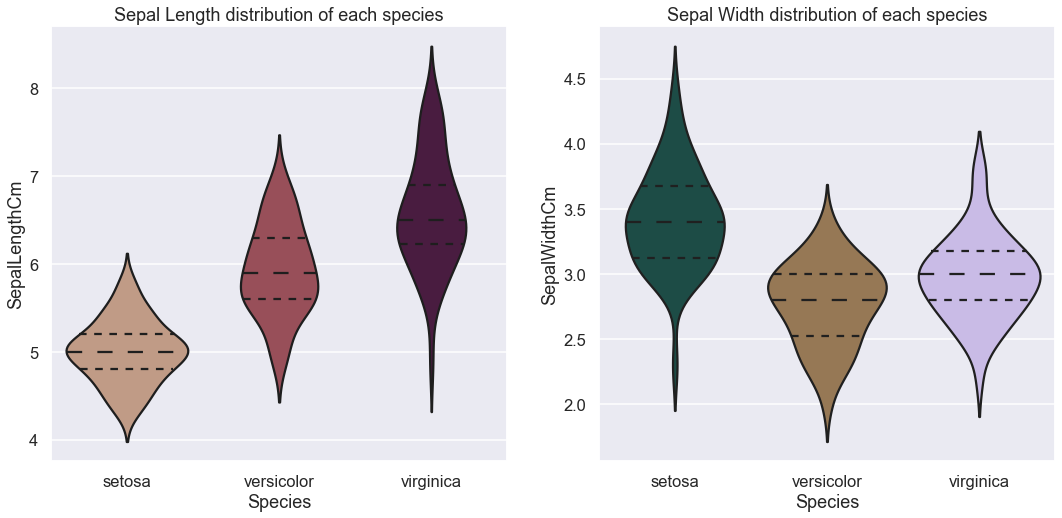

In [10]:
df_vir=df_iris[df_iris['Species']=='virginica']
df_set=df_iris[df_iris['Species']=='setosa']
df_ver=df_iris[df_iris['Species']=='versicolor']


fig, ax = plt.subplots(1,2, figsize=(18,8))

a = sns.violinplot(x='Species',y='SepalLengthCm',data=df_iris,ax=ax[0],orient='v',inner='quartile')
ax[0].set_title('Sepal Length distribution of each species')

b=sns.violinplot(x='Species',y='SepalWidthCm',data=df_iris,ax=ax[1],orient='v',inner='quartile',palette='cubehelix')
ax[1].set_title('Sepal Width distribution of each species')
plt.show()

The various violinplots of each of the species of flowers, the sepal lengths are lowest for Setosa and highest for Vriginica. The inner lines show the quartile. The mid line in each violinplot shows the median values.On the other hand, when we compare the sepal widths, the median sepal width is highest for Setosa.

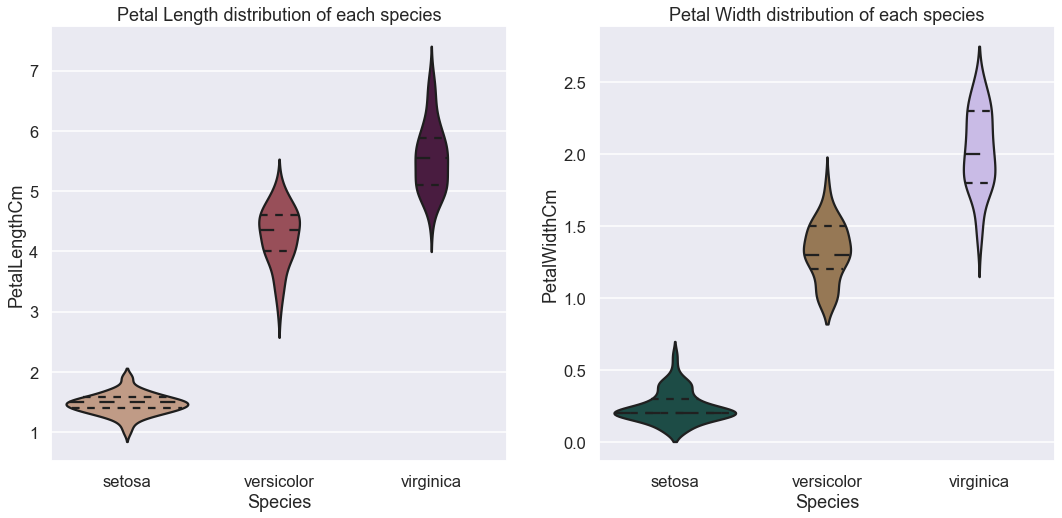

In [11]:
fig, ax = plt.subplots(1,2,figsize=(18,8))

a=sns.violinplot(x='Species',y='PetalLengthCm',data=df_iris,ax=ax[0],orient='v',inner='quartile')
ax[0].set_title('Petal Length distribution of each species')

b=sns.violinplot(x='Species',y='PetalWidthCm',data=df_iris,ax=ax[1],orient='v',inner='quartile',palette='cubehelix')
ax[1].set_title('Petal Width distribution of each species')
plt.show()

The petal dimensions for each of the species vary by a large amount when compared to sepal dimensions.Hence, we can see the violinplots are much further apart.

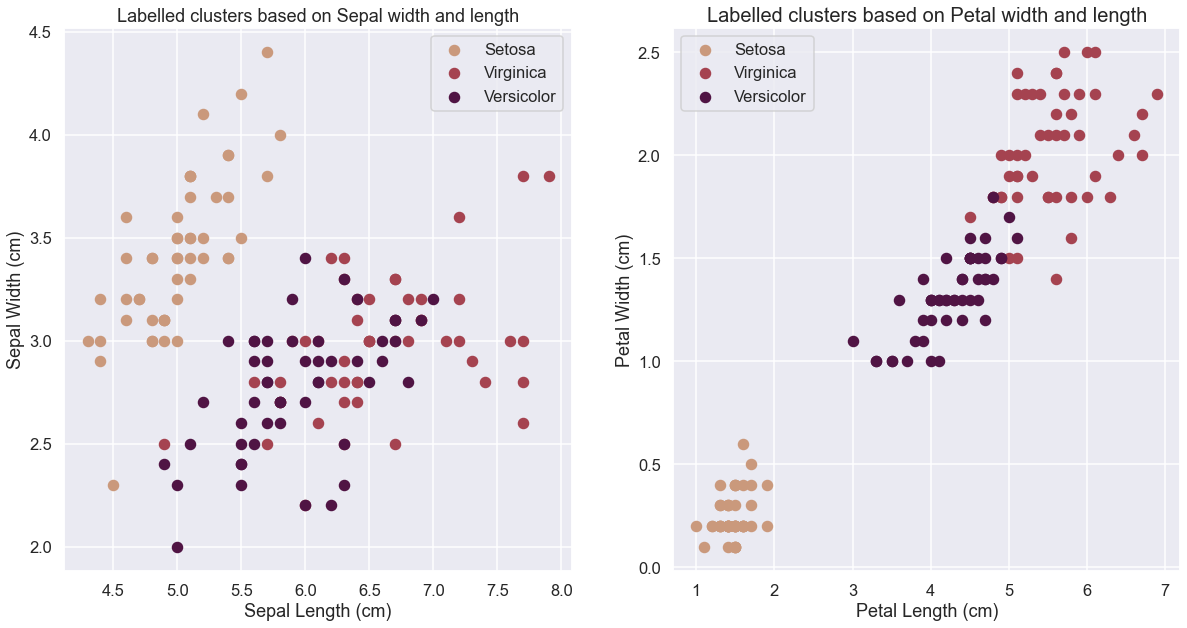

In [12]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].set_title('Labelled clusters based on Sepal width and length')
ax[0].scatter(df_set.iloc[:,0],df_set.iloc[:,1],s=100,label='Setosa')
ax[0].scatter(df_vir.iloc[:,0],df_vir.iloc[:,1],s=100,label='Virginica')
ax[0].scatter(df_ver.iloc[:,0],df_ver.iloc[:,1],s=100,label='Versicolor')
ax[0].set_xlabel('Sepal Length (cm)')
ax[0].set_ylabel('Sepal Width (cm)')
ax[0].legend()


ax[1].set_title('Labelled clusters based on Petal width and length',size=20)
ax[1].scatter(df_set.iloc[:,2],df_set.iloc[:,3],s=100,label='Setosa')
ax[1].scatter(df_vir.iloc[:,2],df_vir.iloc[:,3],s=100,label='Virginica')
ax[1].scatter(df_ver.iloc[:,2],df_ver.iloc[:,3],s=100,label='Versicolor')
ax[1].set_xlabel('Petal Length (cm)')
ax[1].set_ylabel('Petal Width (cm)')
ax[1].legend()
plt.show()

As was established through the violinplots, the petal dimensions are extremely scattered while sepal dimensions are very close to each other.

## Decision Tree Classifier

To predict the species of flower when we are given with any dimensions of sepal and petal. This would require us to perform classification. Let us apply a tree based algorithm called Decision Tree classifier which could help us perform the required classification.

Set the targets as

1. Setosa

2. Virginica

3. Versicolor

In [13]:
df_iris['Species']=df_iris['Species'].replace('setosa',1)
df_iris['Species']=df_iris['Species'].replace('virginica',2)
df_iris['Species']=df_iris['Species'].replace('versicolor',3)

Separate the targets from the input dataframe

In [14]:
targets=df_iris['Species']
df_iris.drop('Species',axis=1,inplace=True)

In [15]:
X=df_iris
y=targets

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,shuffle=True)

In [18]:
dtc=DecisionTreeClassifier(max_depth=6)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [19]:
y_preds=dtc.predict(X_test)
dtc.score(X_test,y_test)

0.9736842105263158

In [20]:
y_preds

array([2, 3, 1, 2, 1, 2, 1, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 1, 1, 2, 3,
       1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 1, 2, 2, 3, 1, 2], dtype=int64)

The decision tree classifier could get a very high accuracy with 97.36 %. Plotting a heatmap of the confusion matrix to understand how many values were correctly predicted.

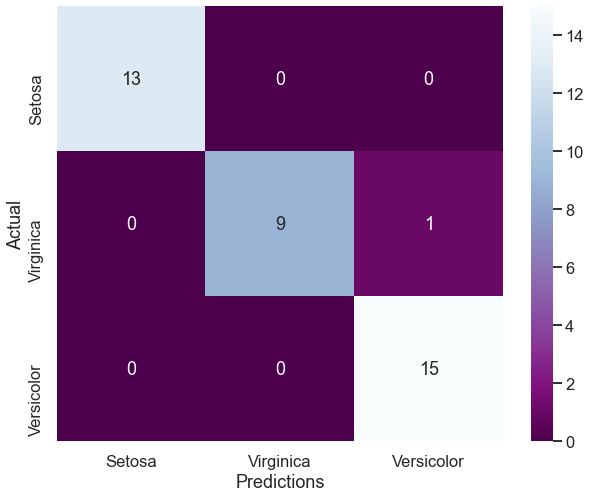

In [21]:
conf_mat=confusion_matrix(y_preds,y_test)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()

sns.heatmap(conf_mat,annot=True,cmap='BuPu_r',ax=ax)
ax.xaxis.set_ticklabels(['Setosa','Virginica','Versicolor'])
ax.yaxis.set_ticklabels(['Setosa','Virginica','Versicolor'])
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

From the above heatmap, only one particular instance was incorrectly classifide by the decision tree. This is an incredibly good classification.

In [22]:
dtc.fit(X_train,y_train)
cols=df_iris.columns
col_arr=np.array(cols).reshape(-1,1)
df_imp=pd.DataFrame(col_arr)
df_imp.rename(columns={0:'Feature'},inplace=True)
imp=(100*dtc.feature_importances_)
df_imp['Importance']=imp
df_imp

,Feature,Importance
0,SepalLengthCm,0.000000
1,SepalWidthCm,2.014872
2,PetalLengthCm,39.927524
3,PetalWidthCm,58.057605


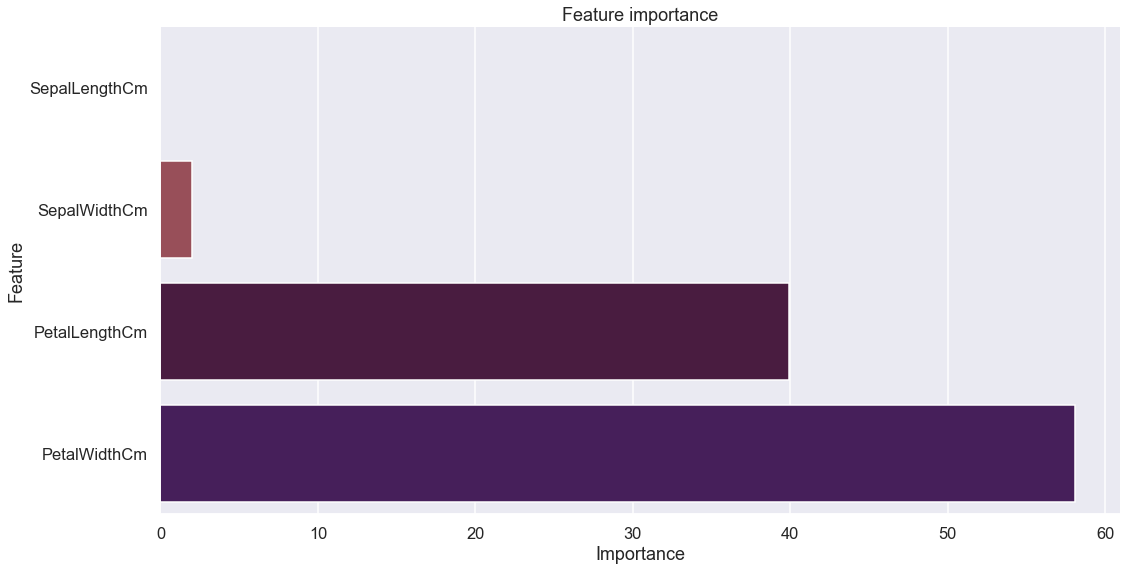

In [23]:
sns.catplot('Importance','Feature',data=df_imp,kind='bar',height=8,aspect=2)
plt.title('Feature importance')
plt.show()

Petal length has the highest importance when it comes to classifying the flowers into their species.

In [24]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
tree.export_graphviz(dtc,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

In [25]:
!dot -Tpng -Gdpi=300 tree.dot -o tree.png

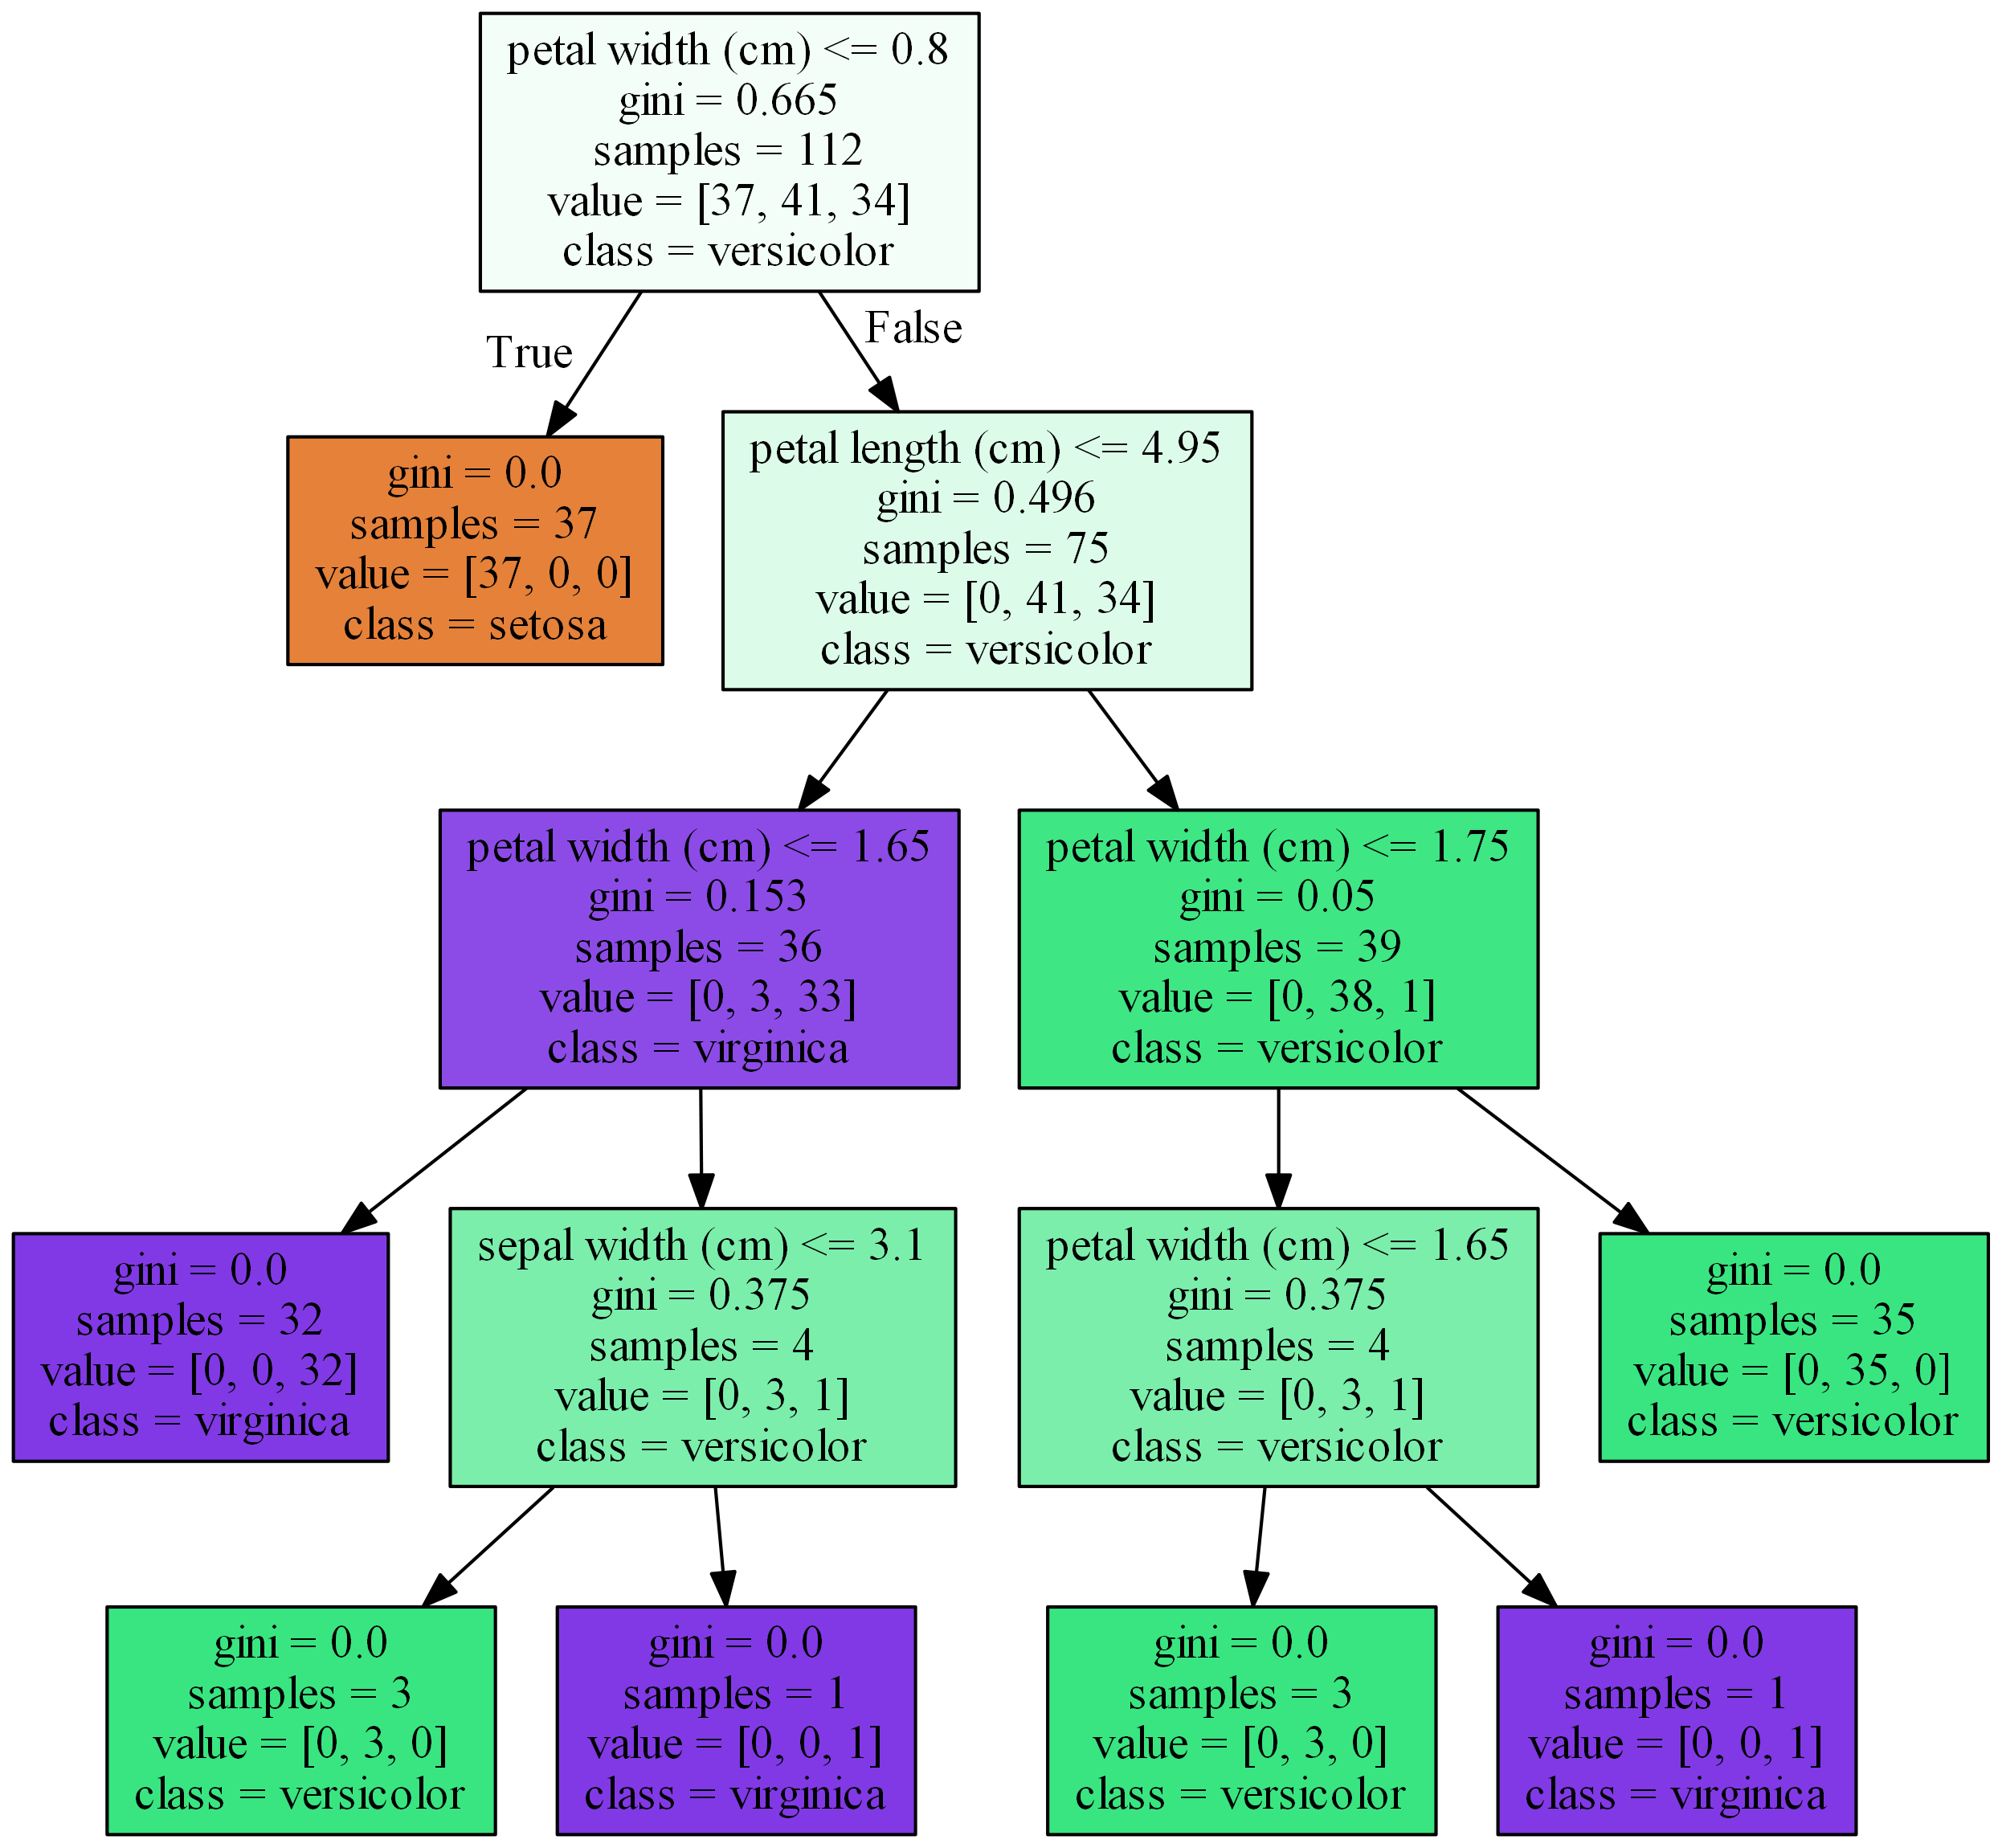

In [26]:
from PIL import Image
tree = Image.open('tree.png')
tree